Human Action Detection

Introduction:
The Human Activity Recognition (HAR) project involves classifying human activities based on sensor data collected from different body parts such as the ankle and wrist. The data consists of readings from multiple sensors, which track accelerations and angular velocities in three dimensions (x, y, and z). This dataset includes various activities such as walking, jogging, climbing stairs, and other daily actions.

The goal of this project is to apply various machine learning models to predict the activity being performed based on sensor readings. The models used for this purpose include Logistic Regression, Lasso Regression, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Gaussian Naive Bayes, and Decision Tree Classifier. Through a comparison of these models, we aim to identify the most accurate model for classifying human activities.

The data undergoes preprocessing, which includes handling missing values, encoding categorical features, scaling numerical features, and removing outliers to ensure optimal performance of the models. The models are then trained on the training dataset and evaluated using common classification metrics such as accuracy, precision, recall, F1 score, and confusion matrices.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm

Attribute Information:

alx: acceleration from the left-ankle sensor (X axis)
aly: acceleration from the left-ankle sensor (Y axis)
alz: acceleration from the left-ankle sensor (Z axis)
glx: gyro from the left-ankle sensor (X axis)
gly: gyro from the left-ankle sensor (Y axis)
glz: gyro from the left-ankle sensor (Z axis)
arx: acceleration from the right-lower-arm sensor (X axis)
ary: acceleration from the right-lower-arm sensor (Y axis)
arz: acceleration from the right-lower-arm sensor (Z axis)
grx: gyro from the right-lower-arm sensor (X axis)
gry: gyro from the right-lower-arm sensor (Y axis)
grz: gyro from the right-lower-arm sensor (Z axis)
subject: volunteer number
Activity: corresponding activity

In [5]:
data = pd.read_csv('HumanAction.csv')
data.head()

alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity   subject  
0  0.187760 -0.44902 -1.0103  0.034483         0  subject1  
1  0.023595 -0.44902 -1.0103  0.034483         0  subject1  
2  0.275720 -0.44902 -1.0103  0.034483         0  subject1  
3  0.367520 -0.45686 -1.0082  0.025862         0  subject1  
4  0.407290 -0.45686 -1.0082  0.025862         0  subject1

In [6]:
data.isnull().any()

alx         False
aly         False
alz         False
glx         False
gly         False
glz         False
arx         False
ary         False
arz         False
grx         False
gry         False
grz         False
Activity    False
subject     False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [8]:
data['Activity'].value_counts()

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

In [9]:
data.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
print(len(data.columns))

14


In [12]:
data_activity_0 = data.query('Activity == 0')
data_activity_else = data.query('Activity != 0')

data_activity_0 = data_activity_0['Activity'].sample(n = 40000)

data = pd.concat([data_activity_0,data_activity_else])

In [13]:
data = data.dropna()

In [14]:
data.isnull().any()

Activity    False
alx         False
aly         False
alz         False
glx         False
gly         False
glz         False
arx         False
ary         False
arz         False
grx         False
gry         False
grz         False
subject     False
dtype: bool

In [15]:
data['Activity'].value_counts()

Activity
1     30720
2     30720
3     30720
4     30720
9     30720
10    30720
11    30720
5     30720
7     29441
8     29337
6     28315
12    10342
Name: count, dtype: int64

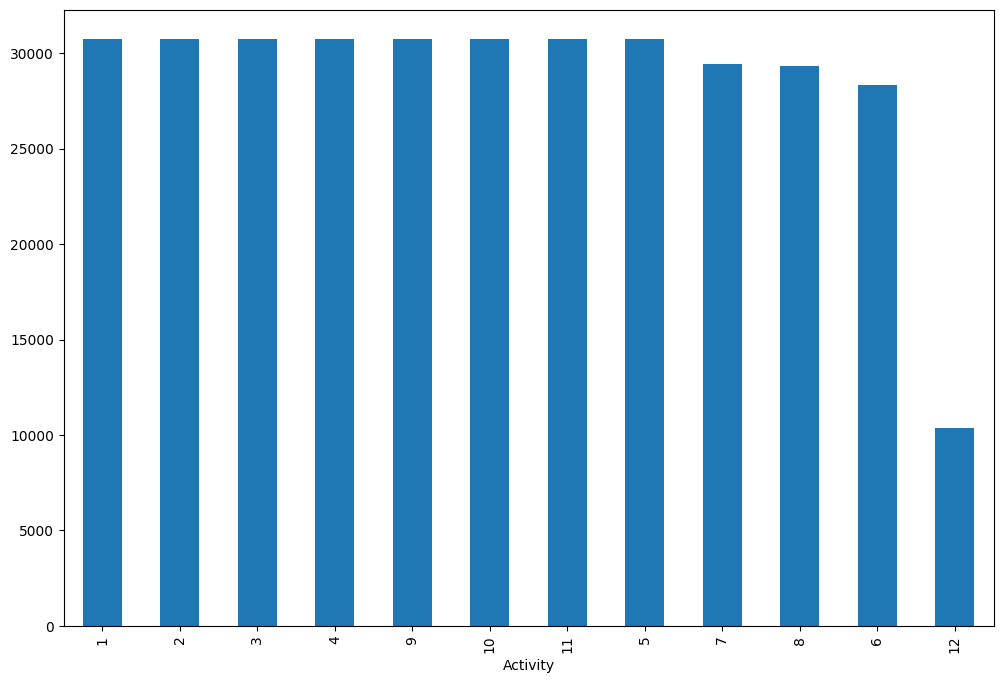

In [16]:
#plt.figure(figsize = (10,8))
data['Activity'].value_counts().plot.bar(figsize = (12,8))
plt.show()

EDA

In [18]:
activity_label = {
    0 : 'None',
    1 : 'Standing still (1 min)',
    2 : 'Sitting and relaxing (1 min)',
    3 : 'Lying down (1 min)',
    4 : 'Walking (1 min)',
    5 : 'Climbing stairs (1 min)',
    6 : 'Waist bends forward (20x)',
    7 : 'Frontal elevation of arms',
    8 : 'Knees bending (crowching) (20x)',
    9 : 'Cycling (1 min)',
    10 : 'Jogging (1 min)',
    11 : 'Running (1 min)',
    12 : 'Jump front and back (20x)'
}

In [19]:
data['Activity'] = data['Activity'].map(activity_label)
data['Activity'].value_counts()

Activity
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Jogging (1 min)                    30720
Running (1 min)                    30720
Climbing stairs (1 min)            30720
Frontal elevation of arms          29441
Knees bending (crowching) (20x)    29337
Waist bends forward (20x)          28315
Jump front and back (20x)          10342
Name: count, dtype: int64

----------Standing still (1 min) - readings--------------


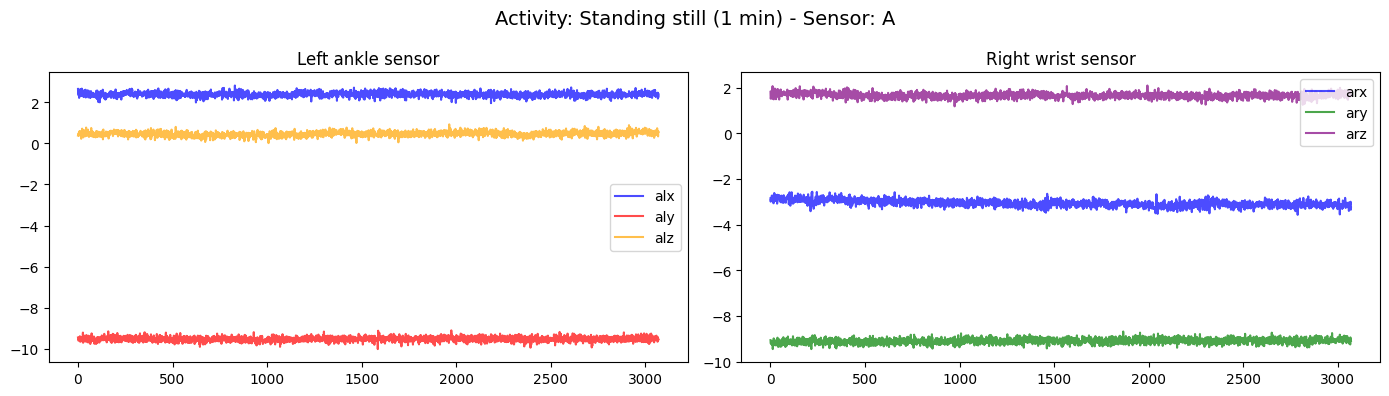

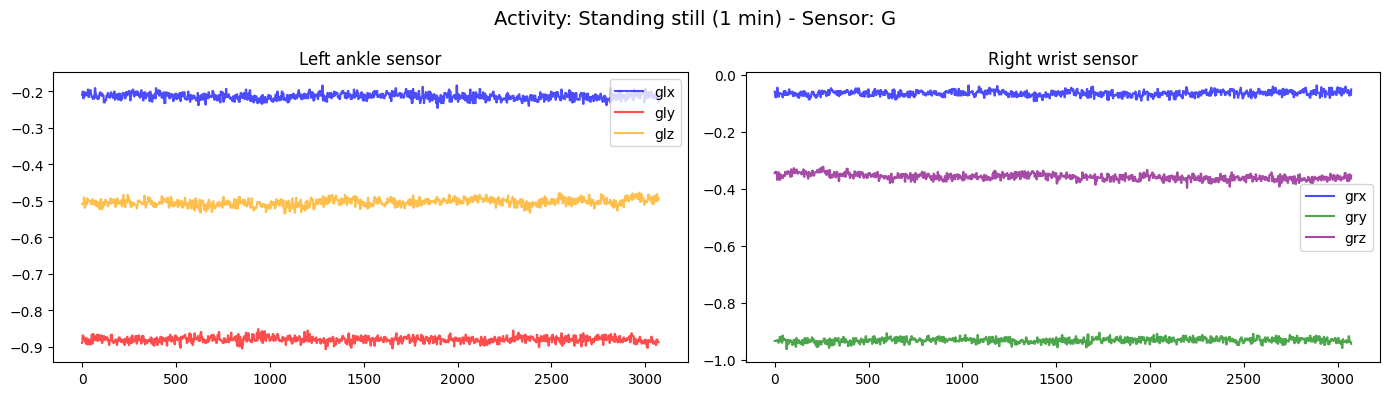

----------Sitting and relaxing (1 min) - readings--------------


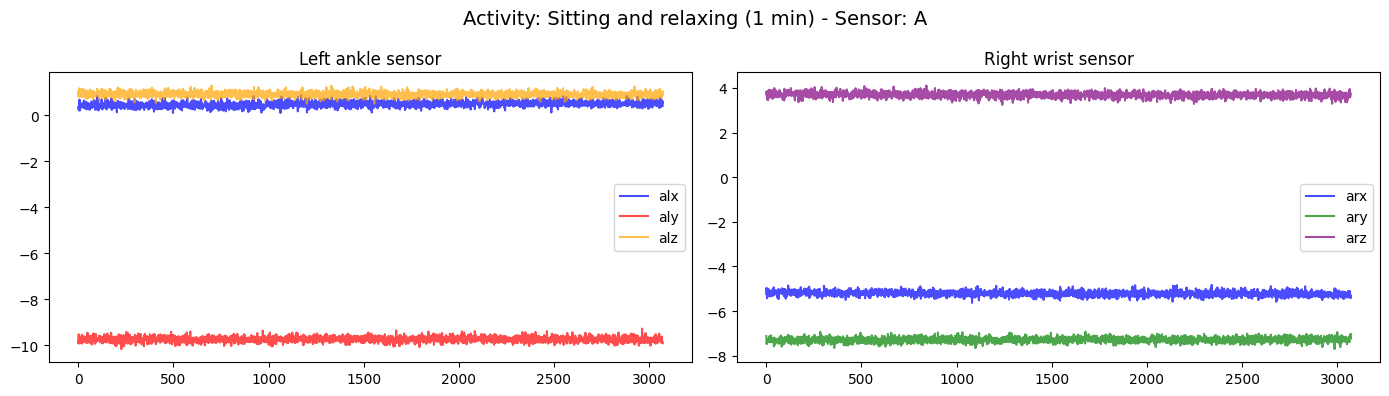

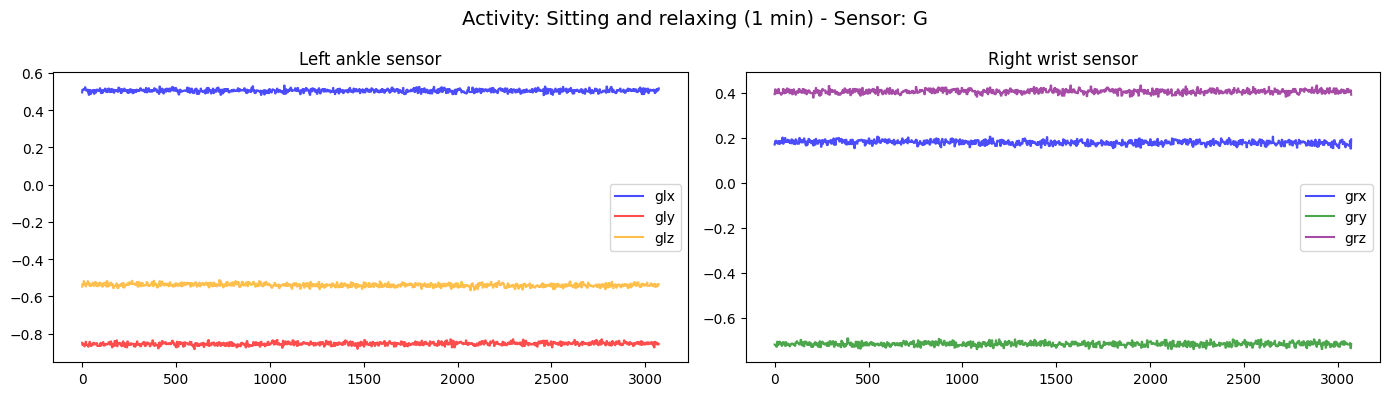

----------Lying down (1 min) - readings--------------


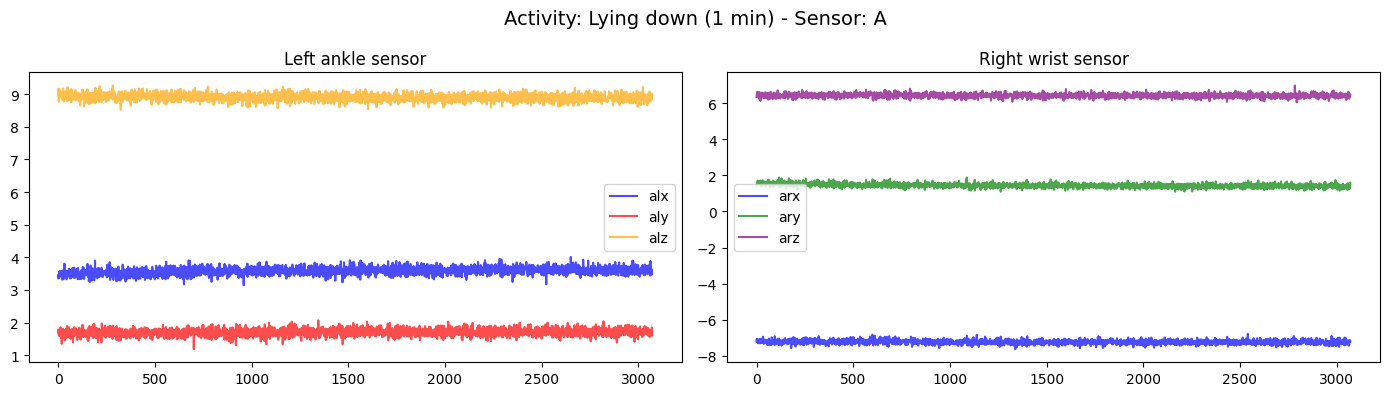

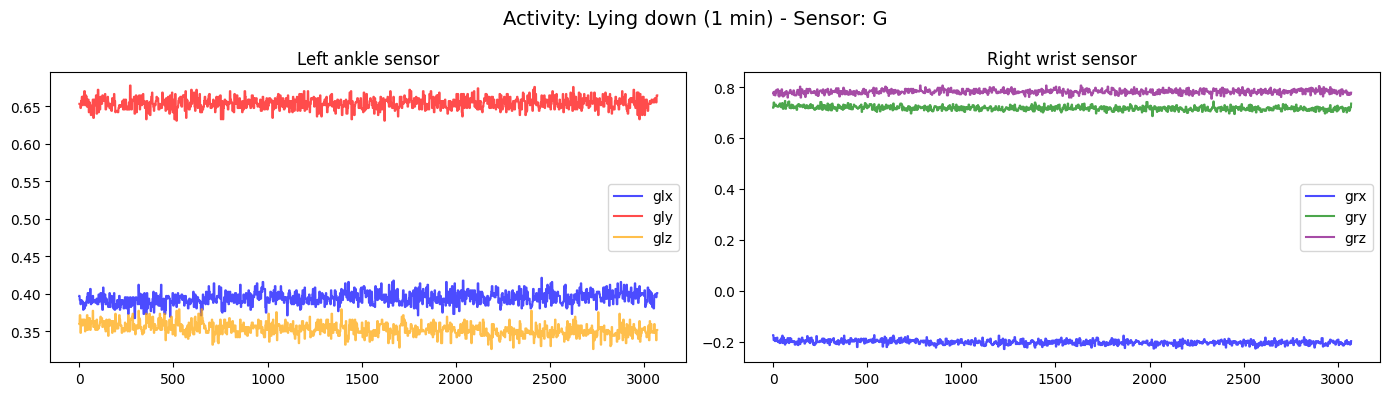

----------Walking (1 min) - readings--------------


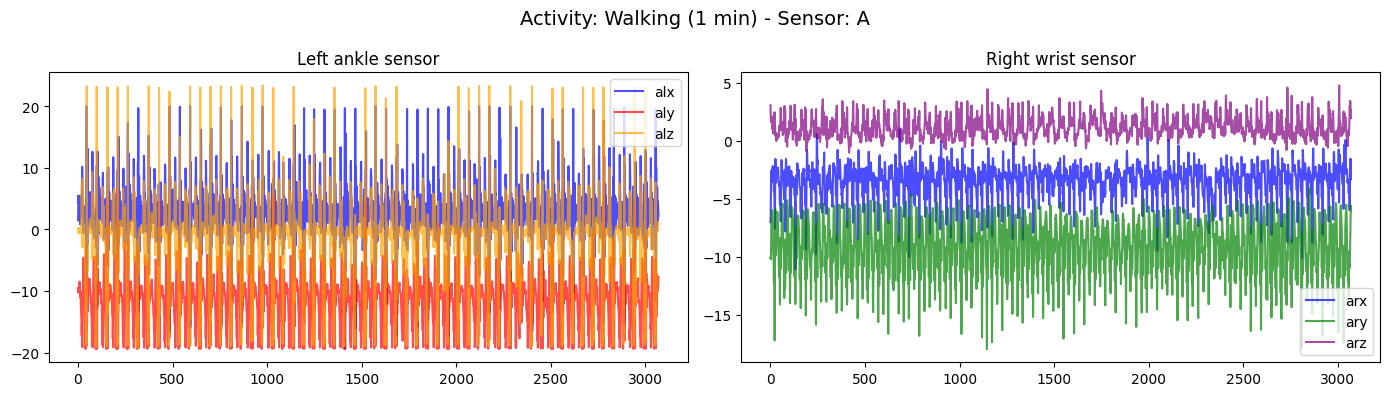

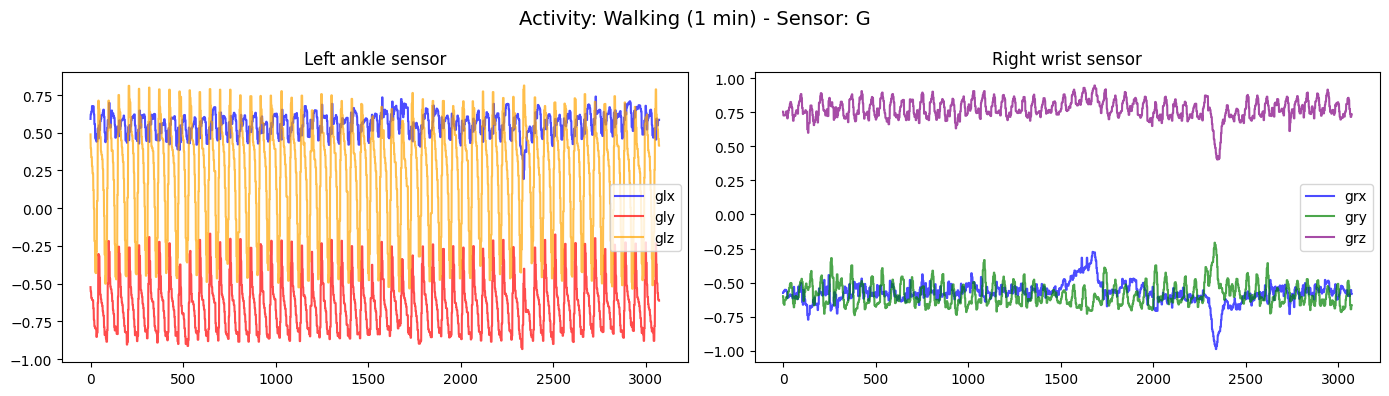

----------Climbing stairs (1 min) - readings--------------


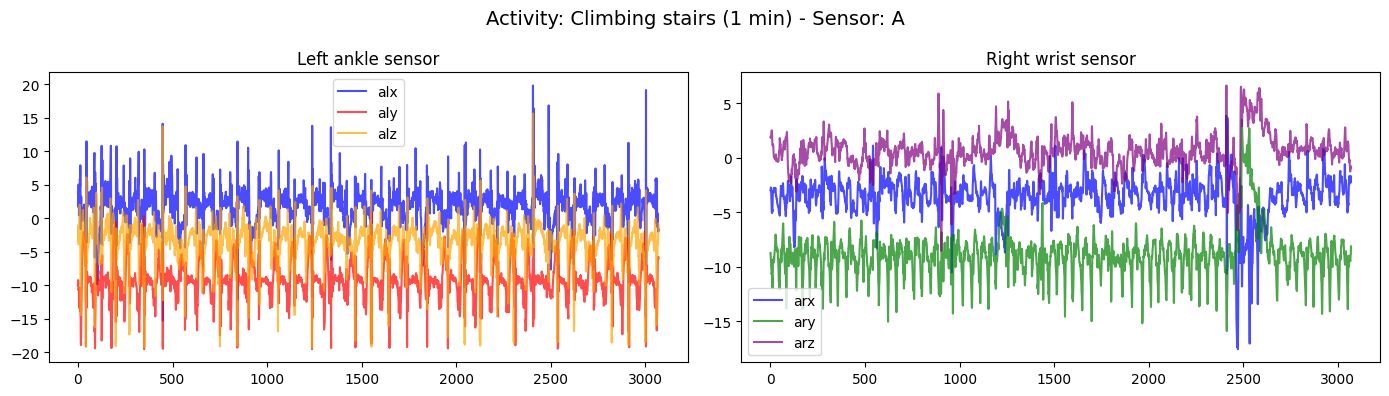

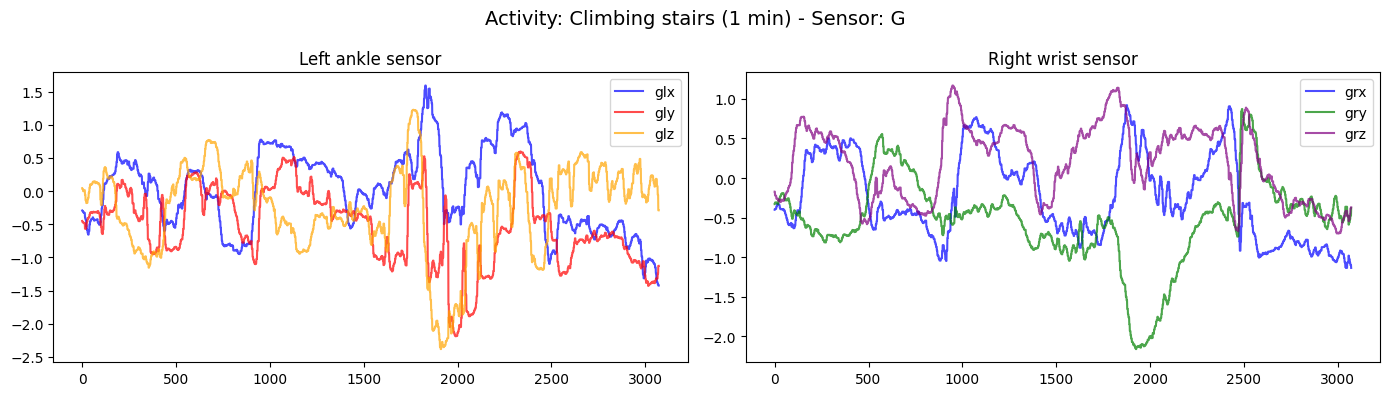

----------Waist bends forward (20x) - readings--------------


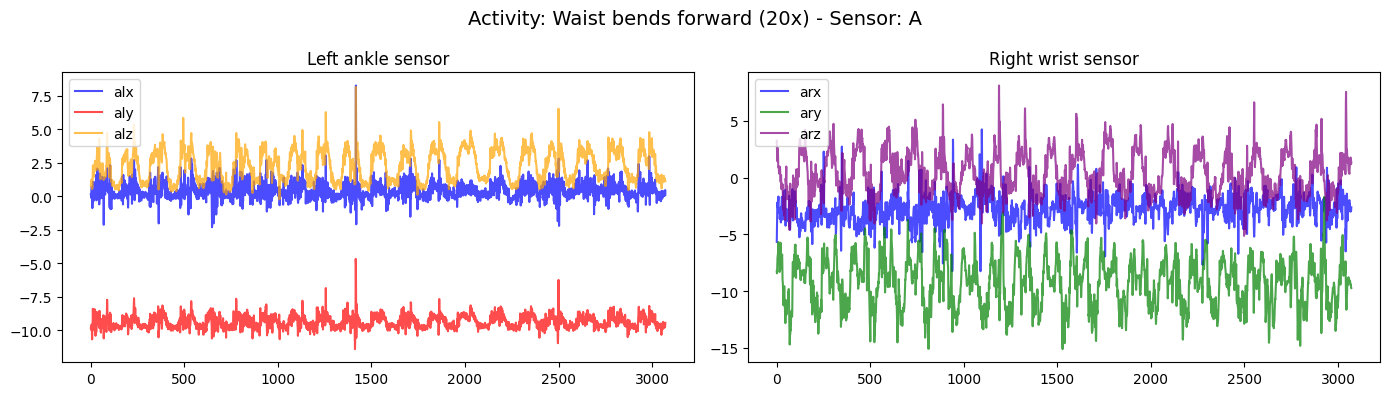

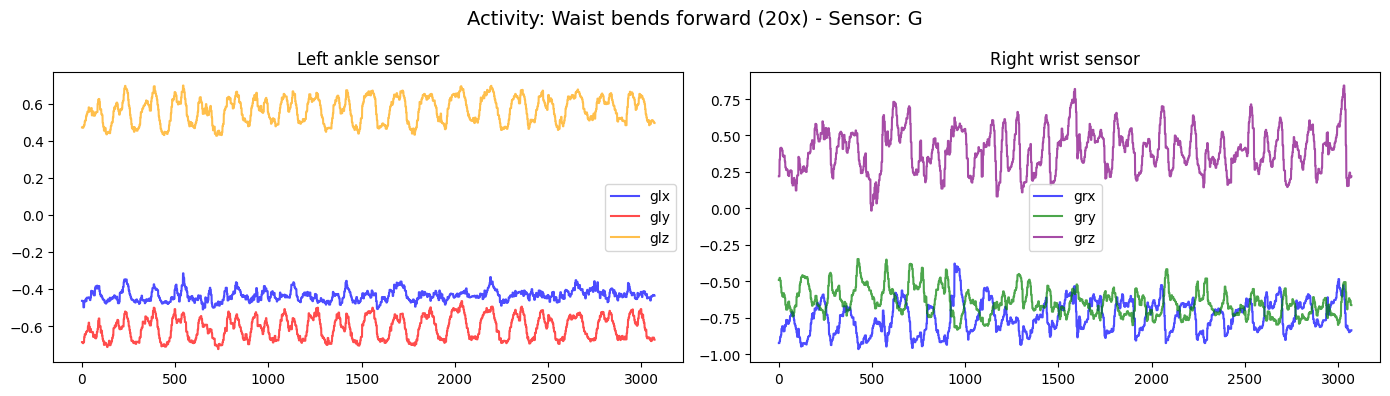

----------Frontal elevation of arms - readings--------------


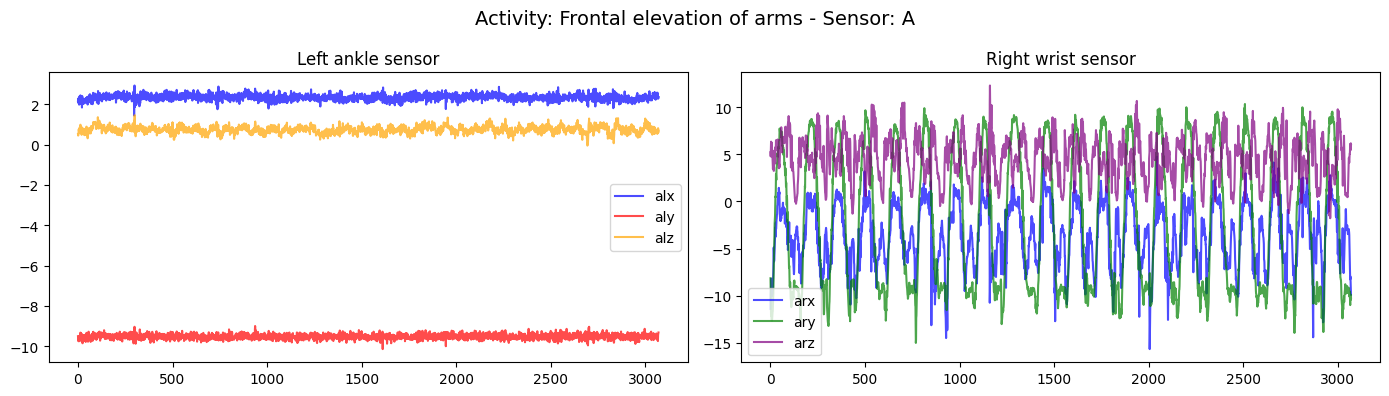

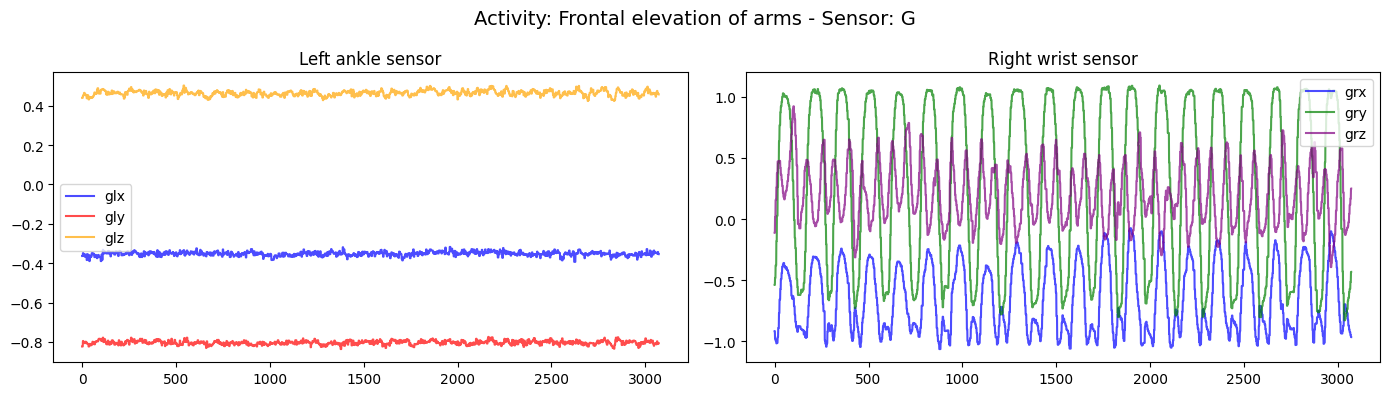

----------Knees bending (crowching) (20x) - readings--------------


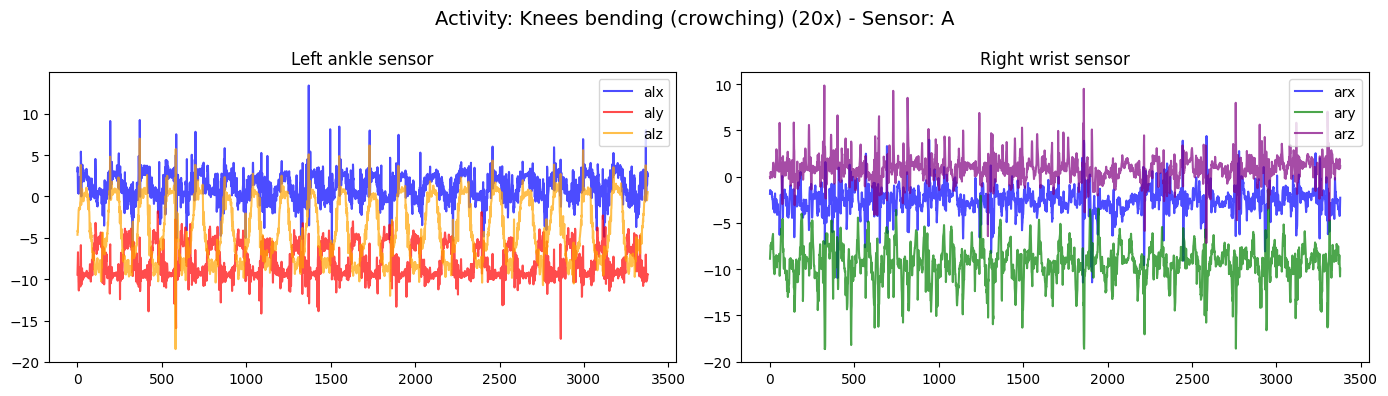

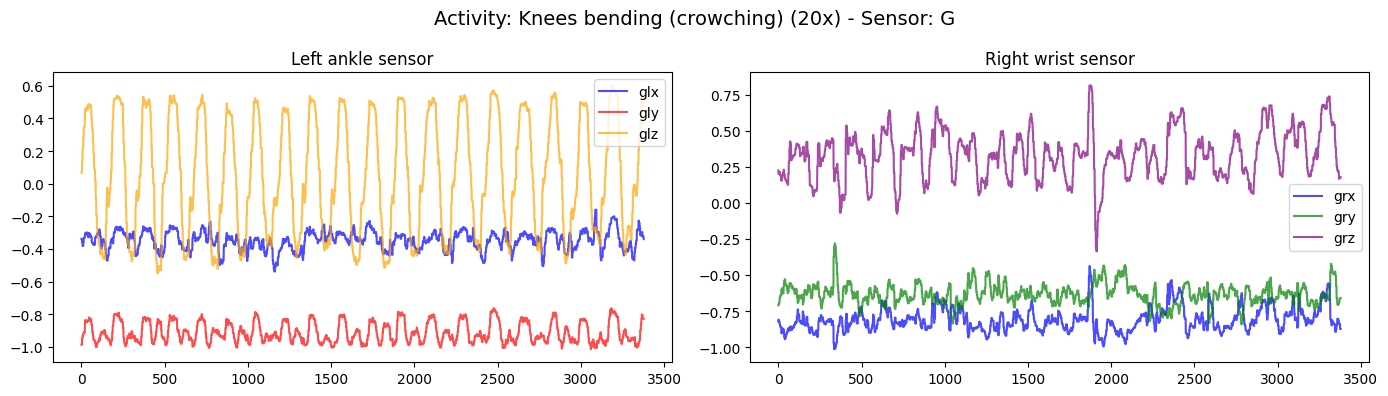

----------Cycling (1 min) - readings--------------


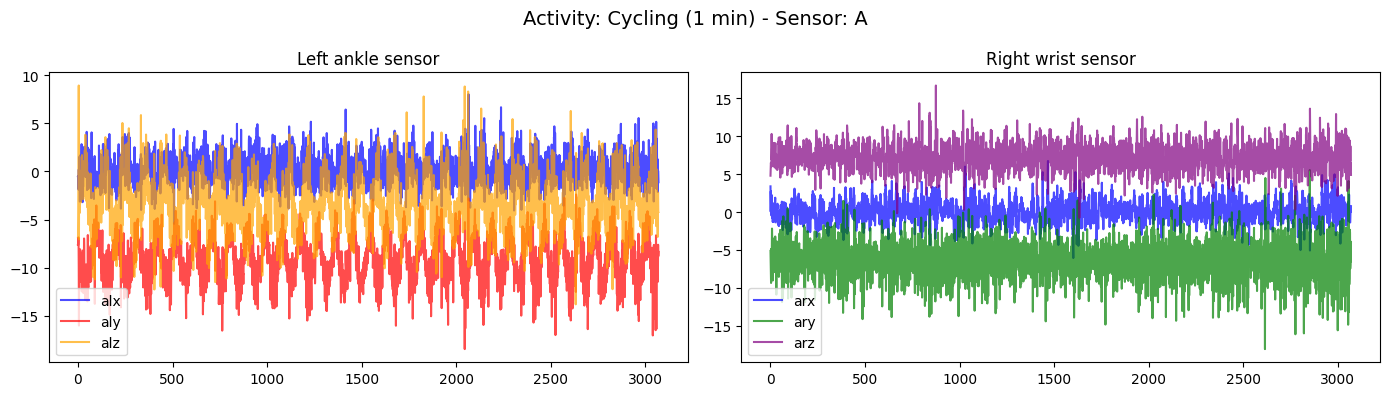

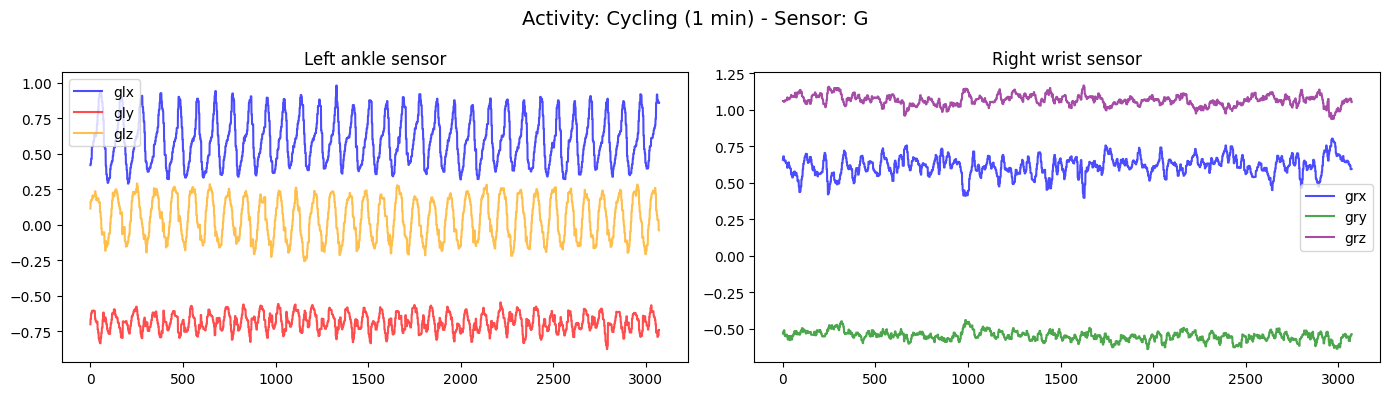

----------Jogging (1 min) - readings--------------


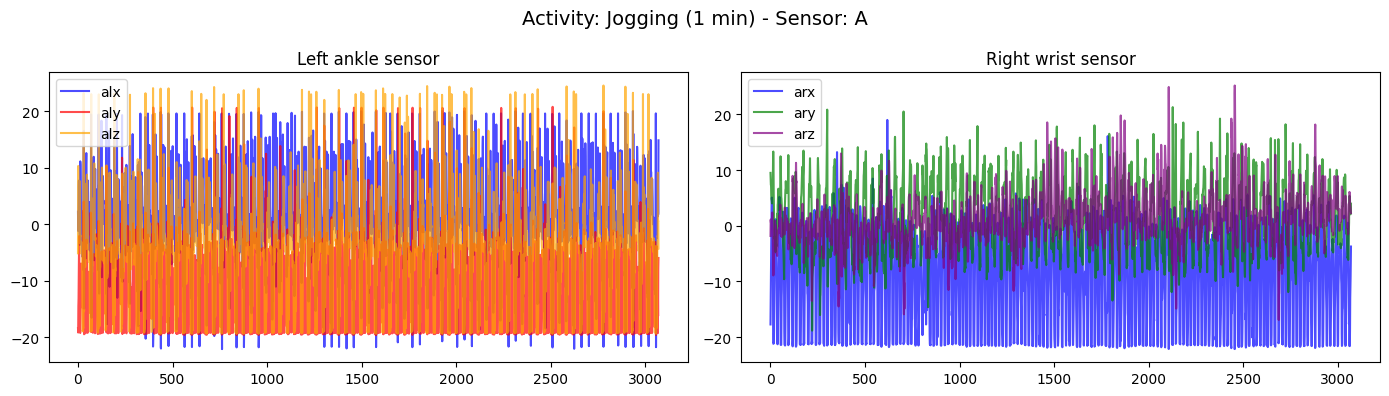

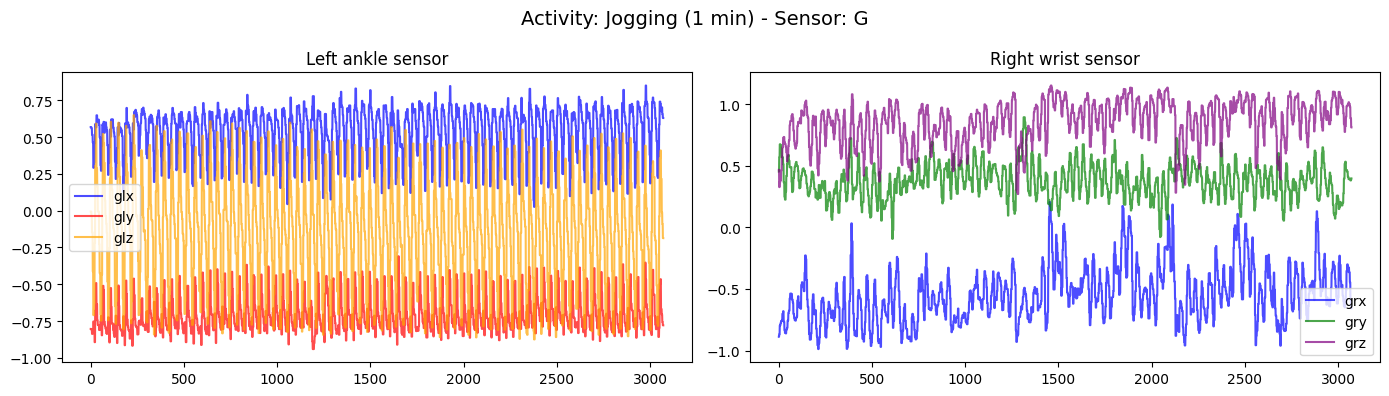

----------Running (1 min) - readings--------------


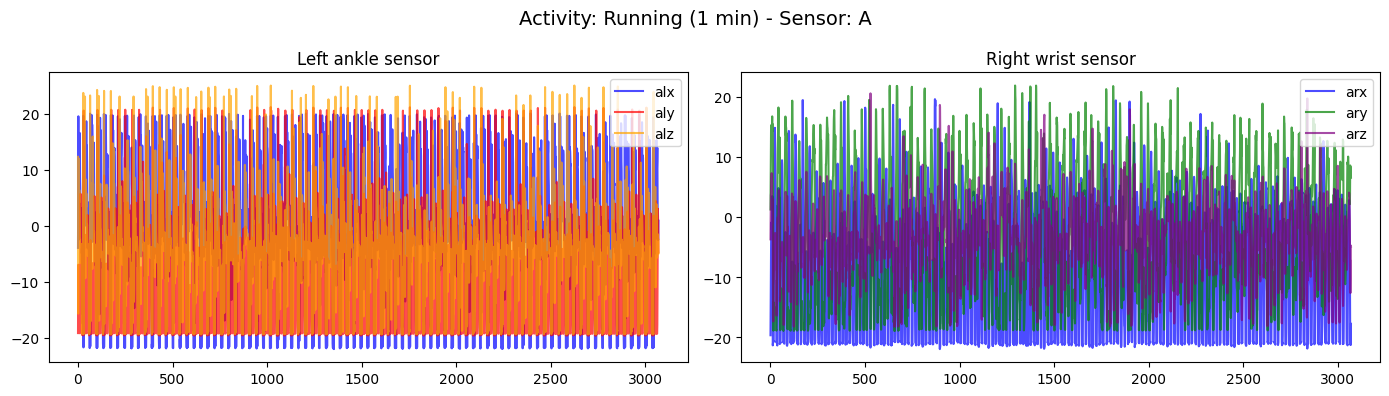

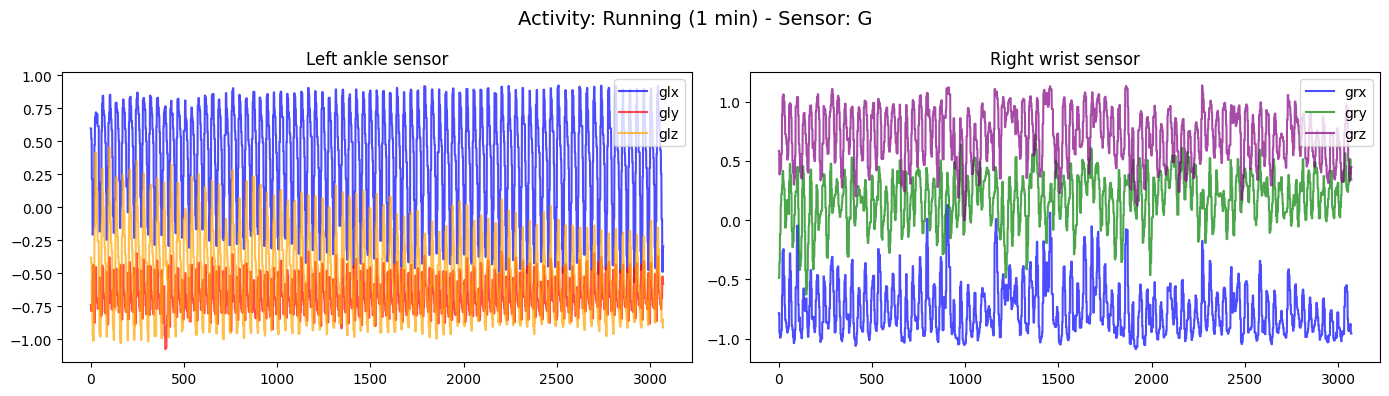

----------Jump front and back (20x) - readings--------------


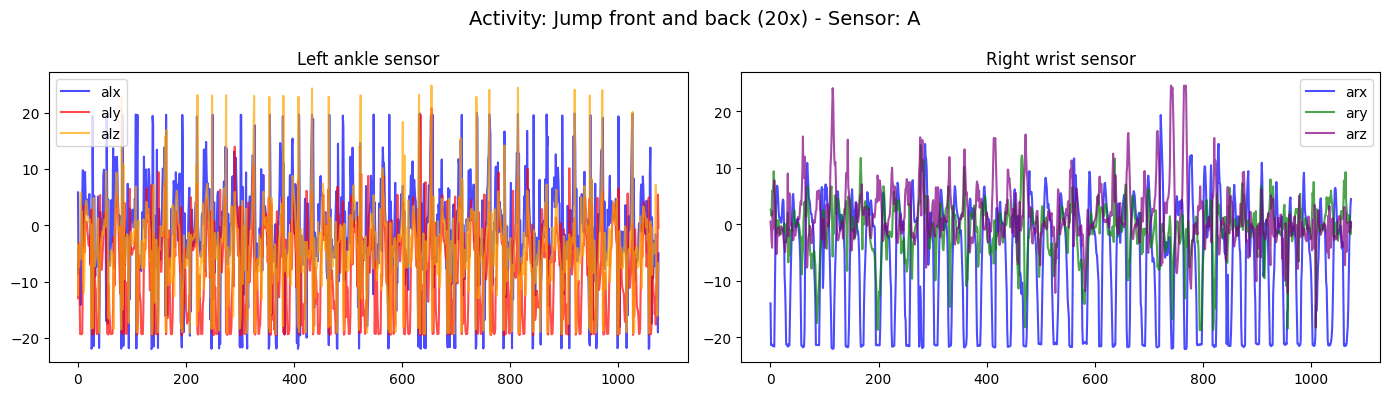

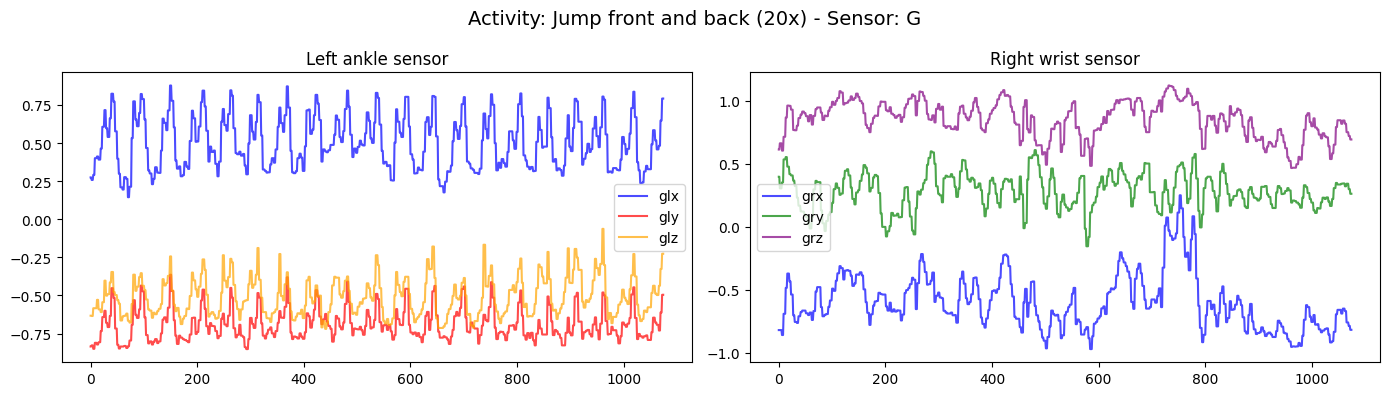

In [20]:
subject1 = data[data['subject'] == 'subject1']
readings = ['a', 'g']


grouped = subject1.groupby('Activity')

for i in range(1, 13):
    activity_name = activity_label[i]

    print(f"----------{activity_name} - readings--------------")

    activity_data = grouped.get_group(activity_name).reset_index(drop=True)

    for r in readings:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
        fig.suptitle(f'Activity: {activity_name} - Sensor: {r.upper()}', fontsize=14)

        # Left ankle
        ax1.plot(activity_data[r + "lx"], color='blue', alpha=0.7, label=r + "lx")
        ax1.plot(activity_data[r + "ly"], color='red', alpha=0.7, label=r + "ly")
        ax1.plot(activity_data[r + "lz"], color='orange', alpha=0.7, label=r + "lz")
        ax1.set_title('Left ankle sensor')
        ax1.legend()

        # Right wrist
        ax2.plot(activity_data[r + "rx"], color='blue', alpha=0.7, label=r + "rx")
        ax2.plot(activity_data[r + "ry"], color='green', alpha=0.7, label=r + "ry")
        ax2.plot(activity_data[r + "rz"], color='purple', alpha=0.7, label=r + "rz")
        ax2.set_title('Right wrist sensor')
        ax2.legend()

        plt.tight_layout()
        plt.show()

----------Standing still (1 min) - readings--------------


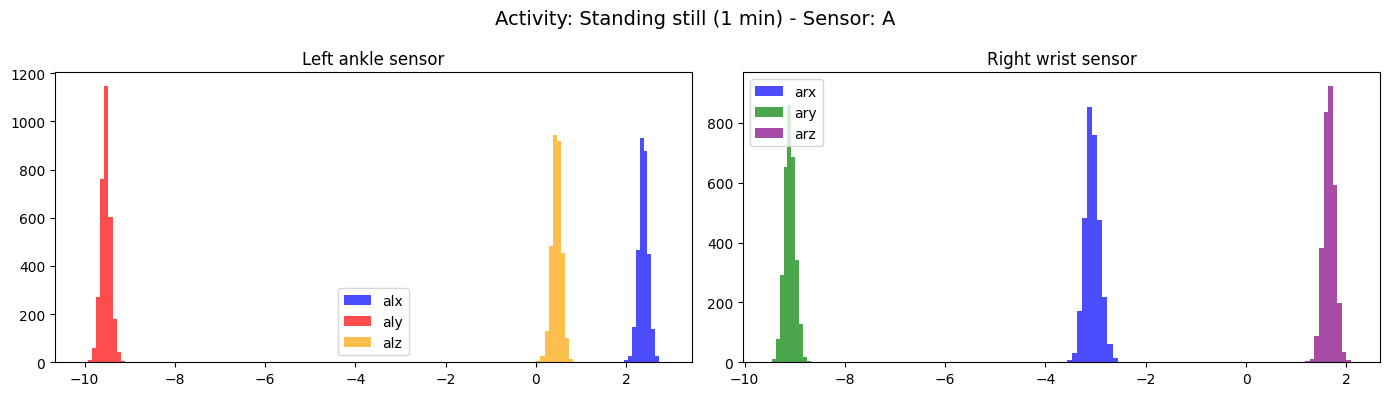

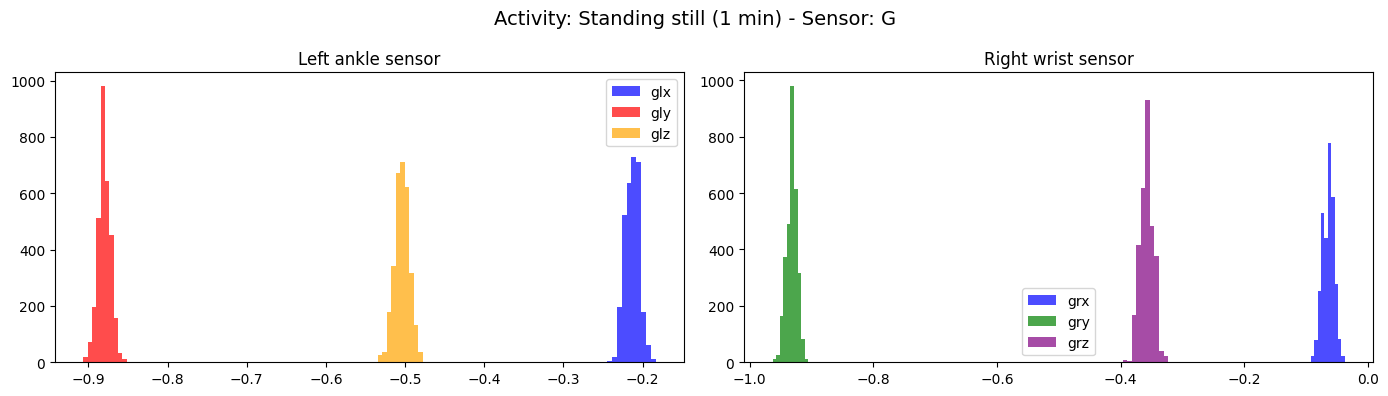

----------Sitting and relaxing (1 min) - readings--------------


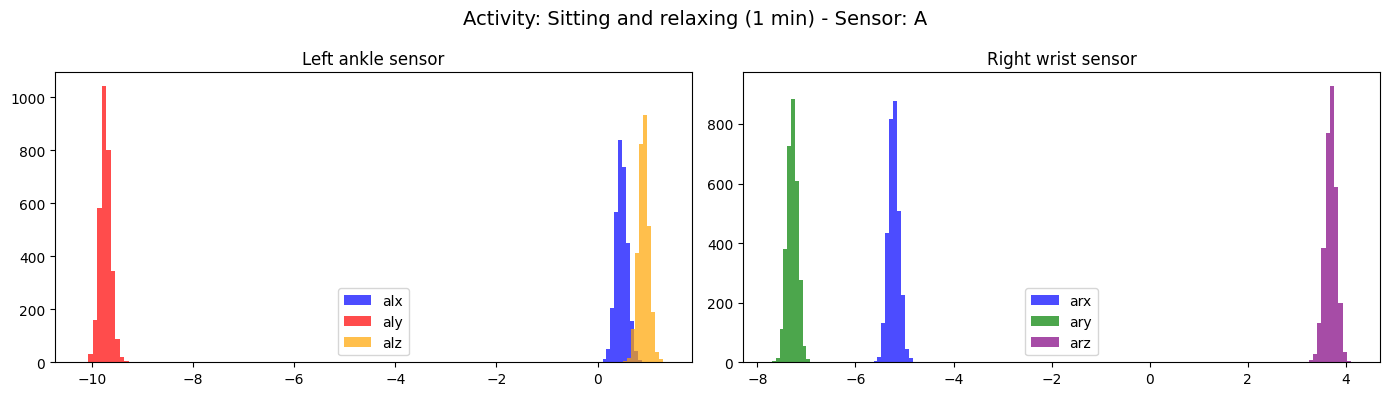

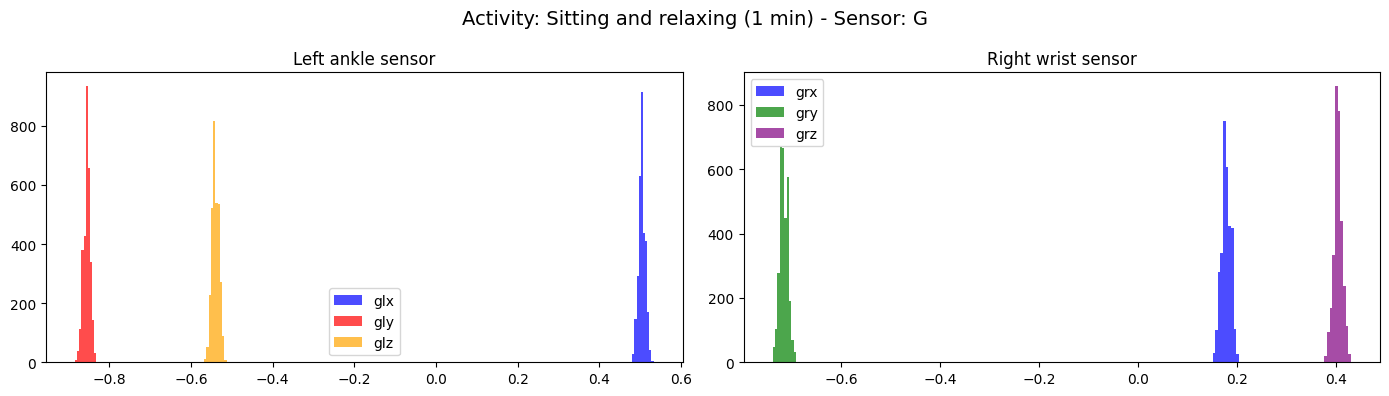

----------Lying down (1 min) - readings--------------


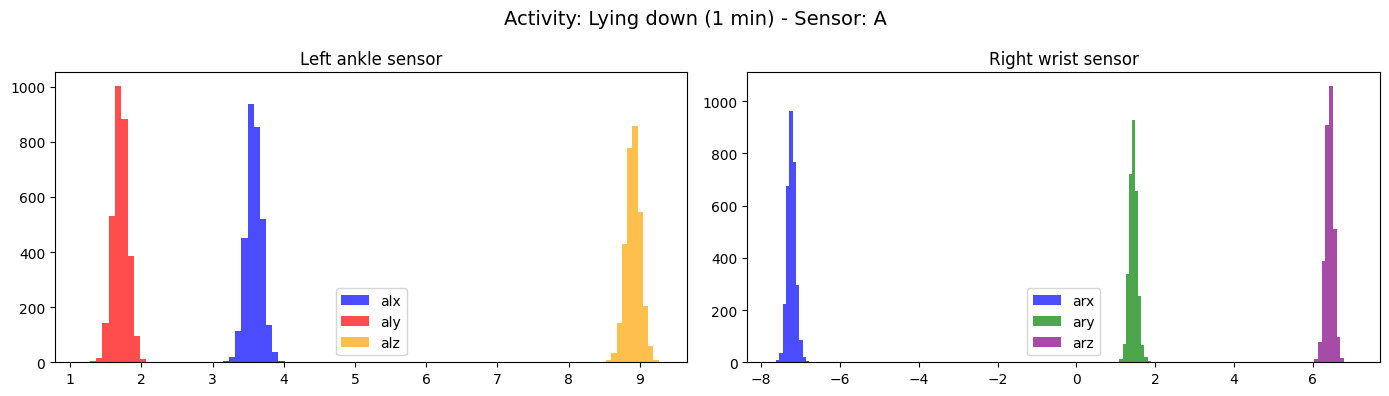

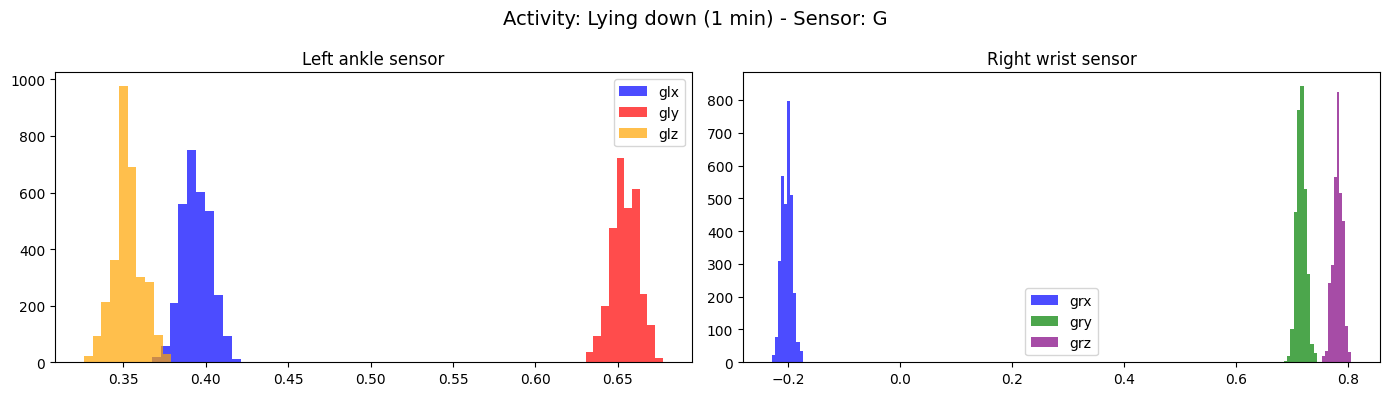

----------Walking (1 min) - readings--------------


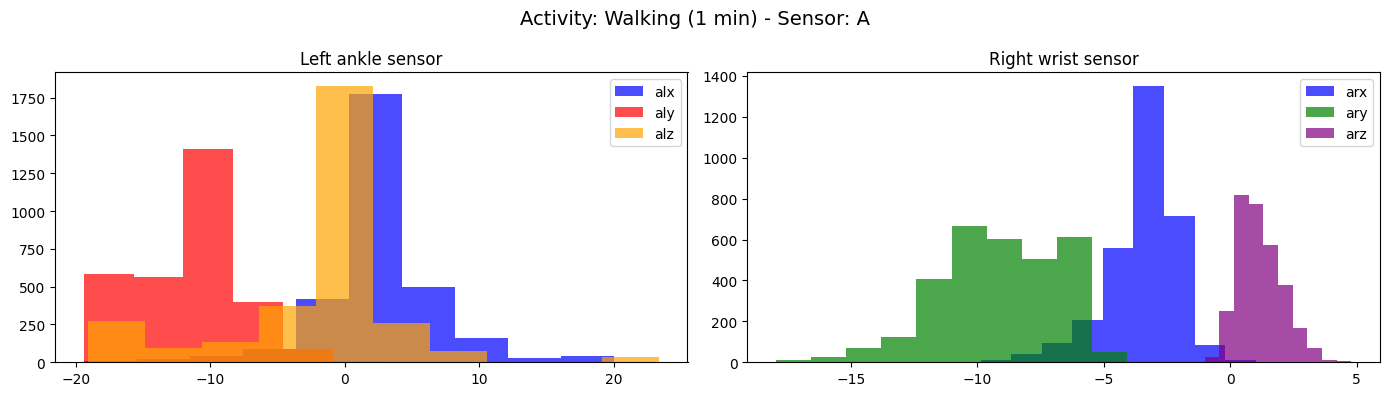

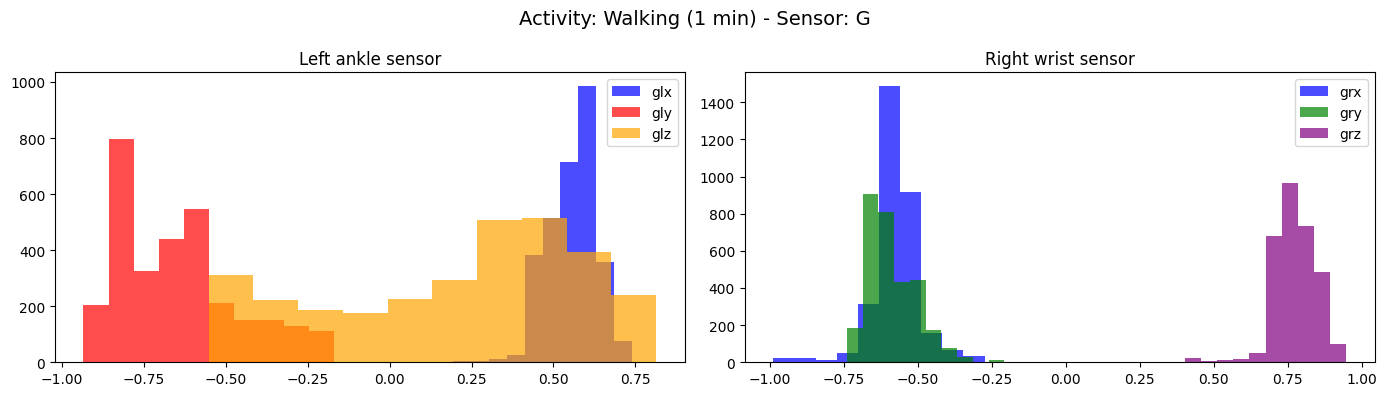

----------Climbing stairs (1 min) - readings--------------


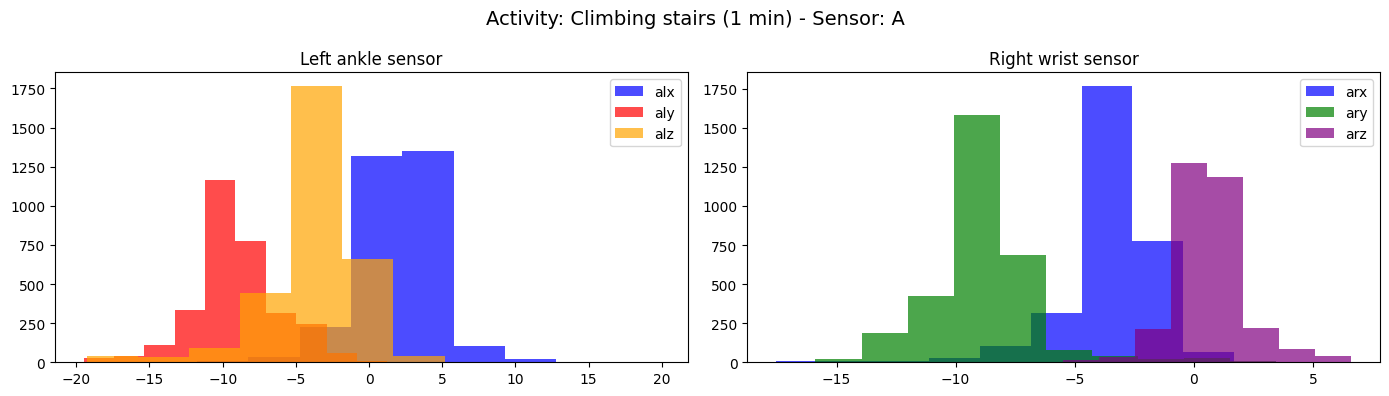

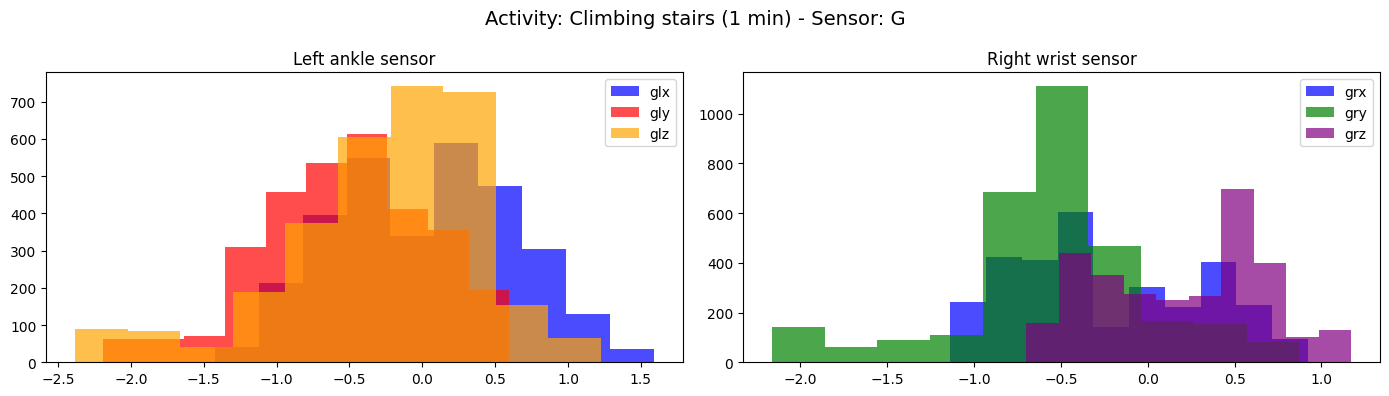

----------Waist bends forward (20x) - readings--------------


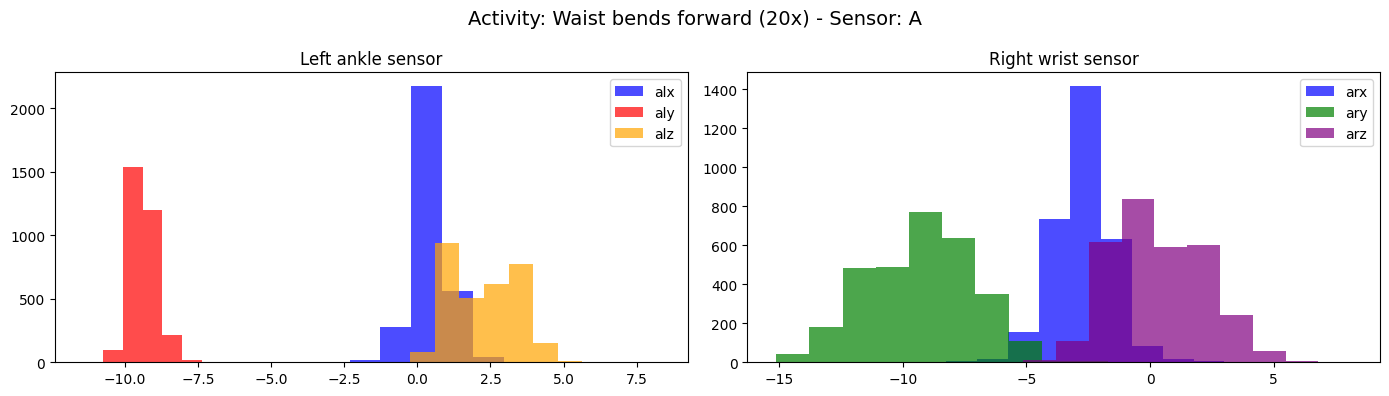

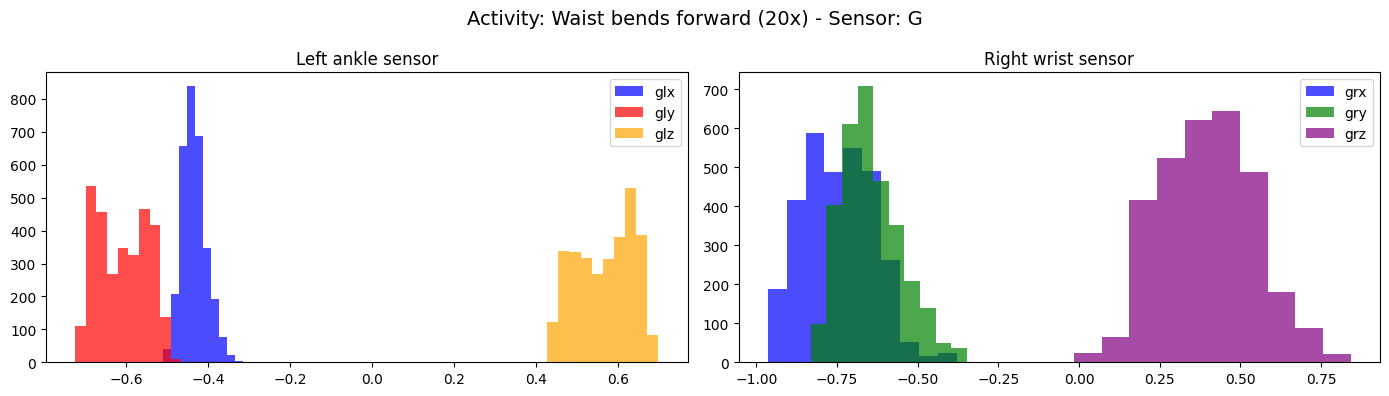

----------Frontal elevation of arms - readings--------------


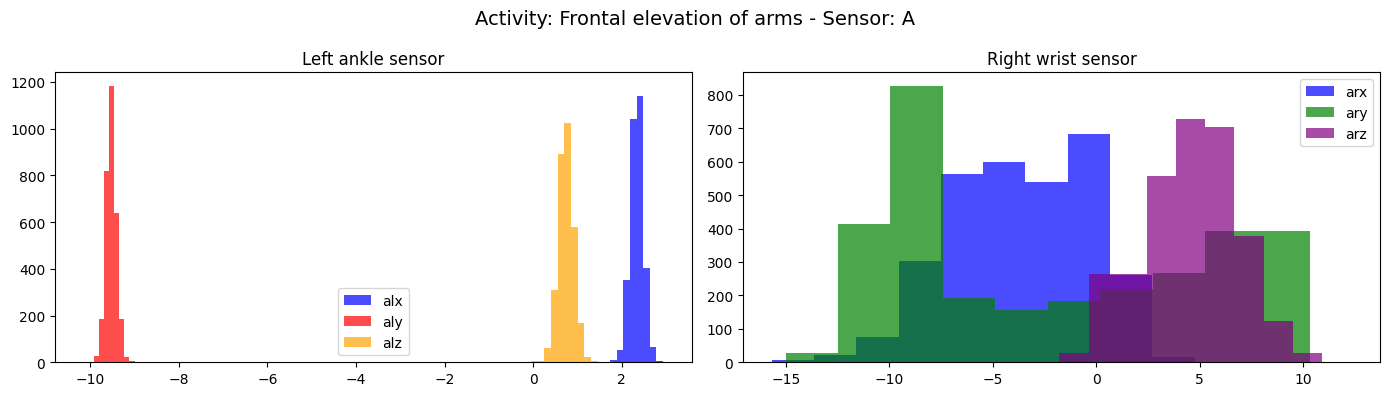

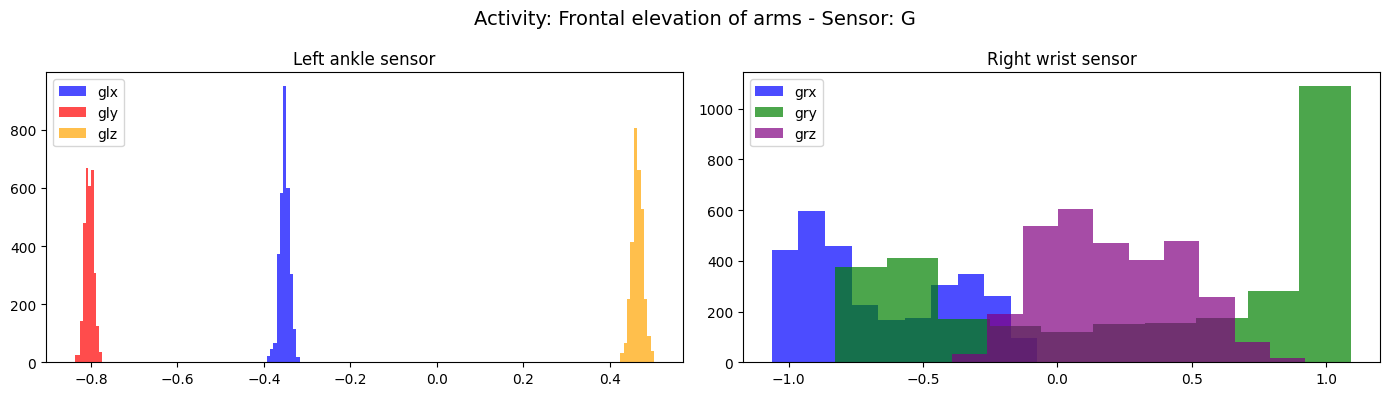

----------Knees bending (crowching) (20x) - readings--------------


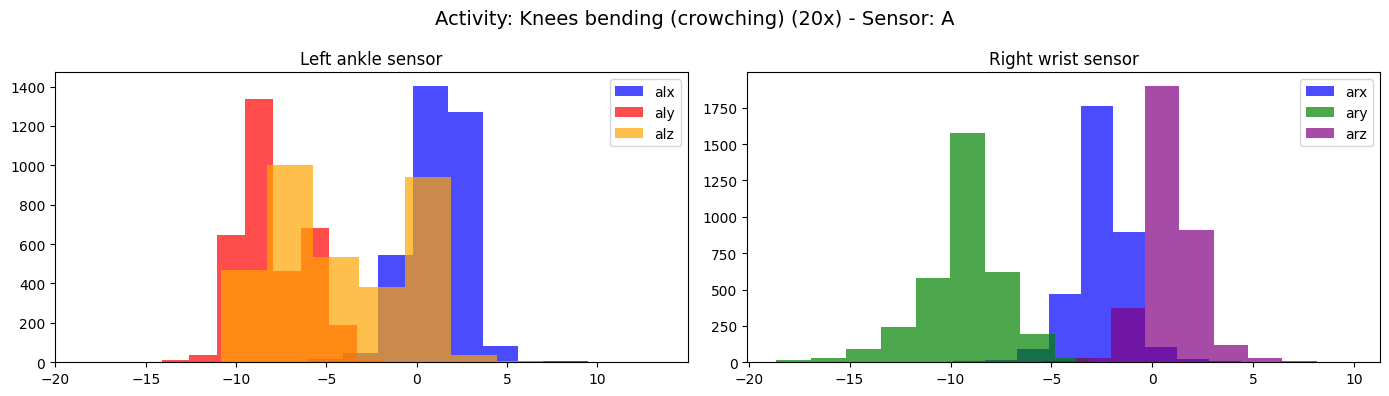

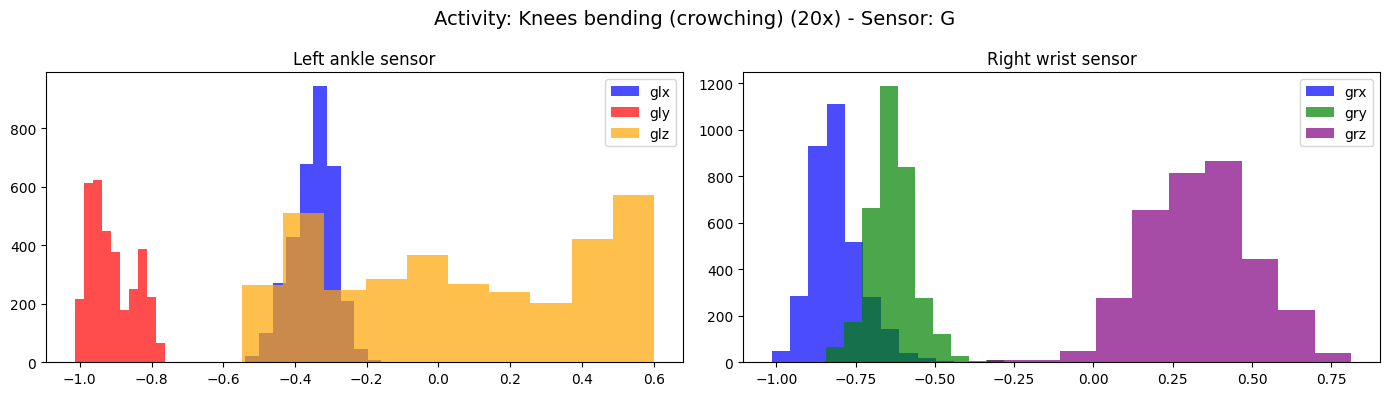

----------Cycling (1 min) - readings--------------


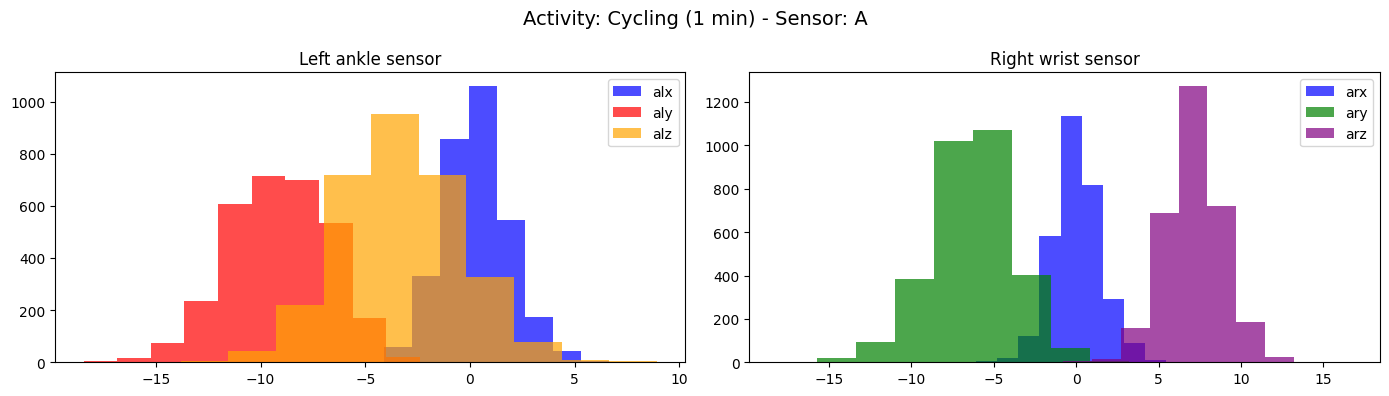

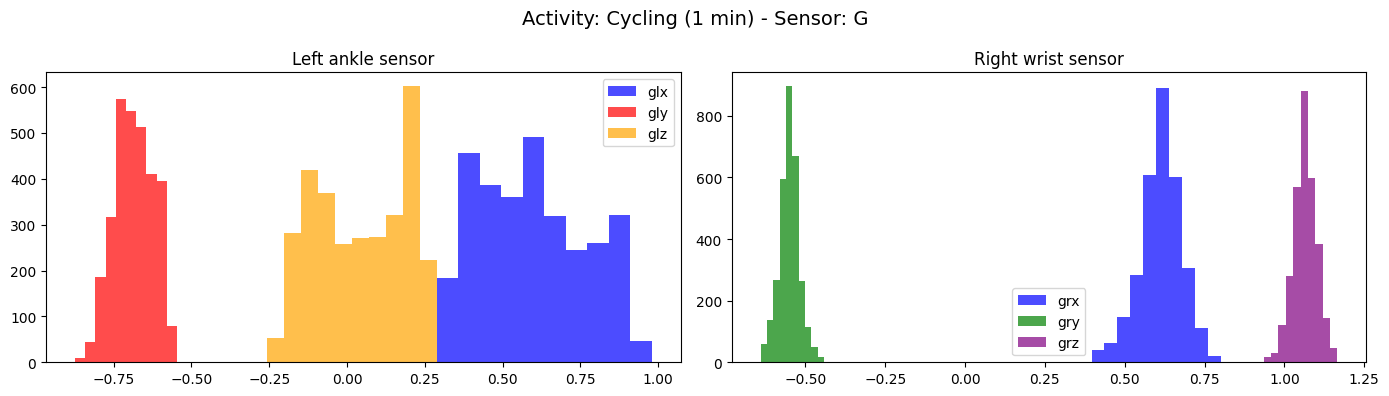

----------Jogging (1 min) - readings--------------


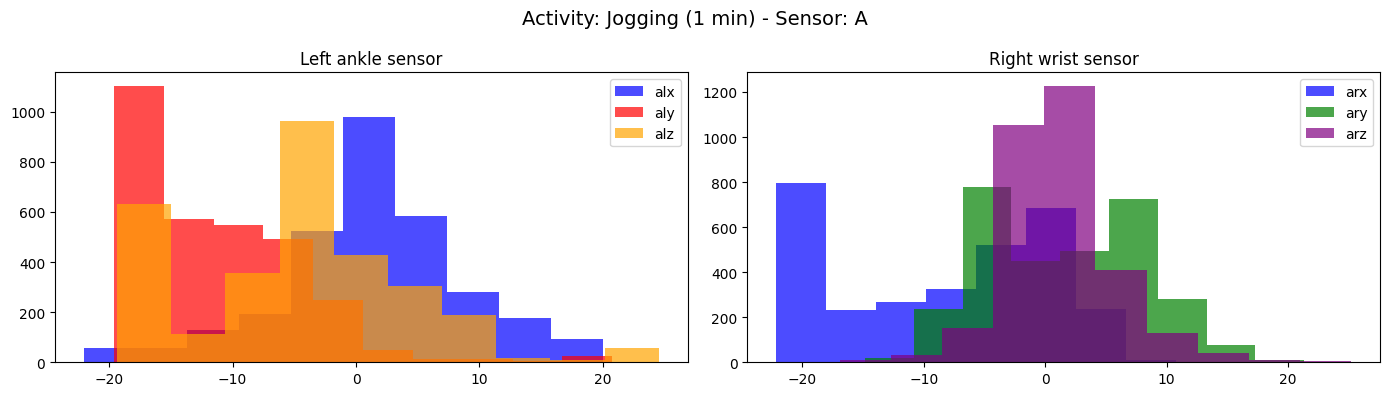

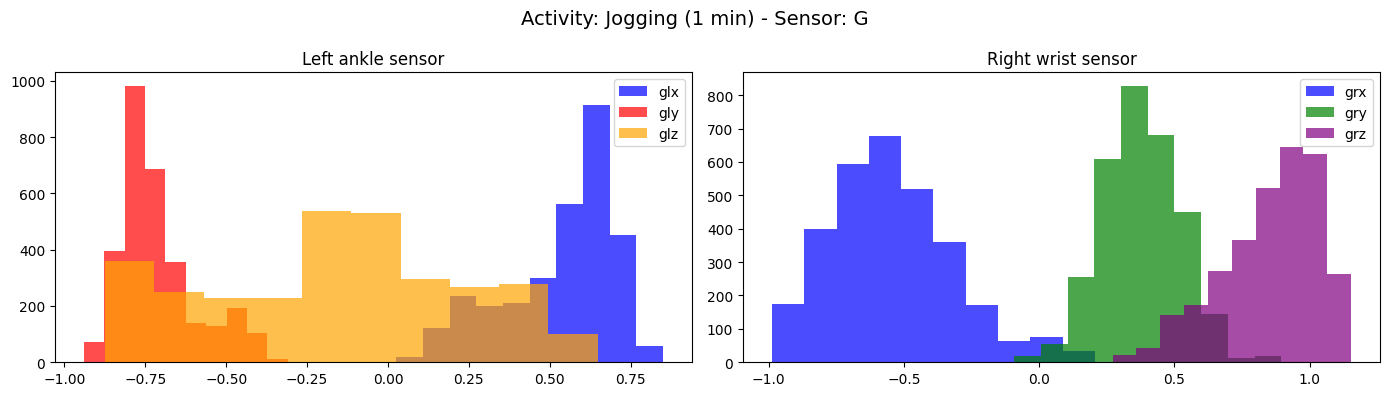

----------Running (1 min) - readings--------------


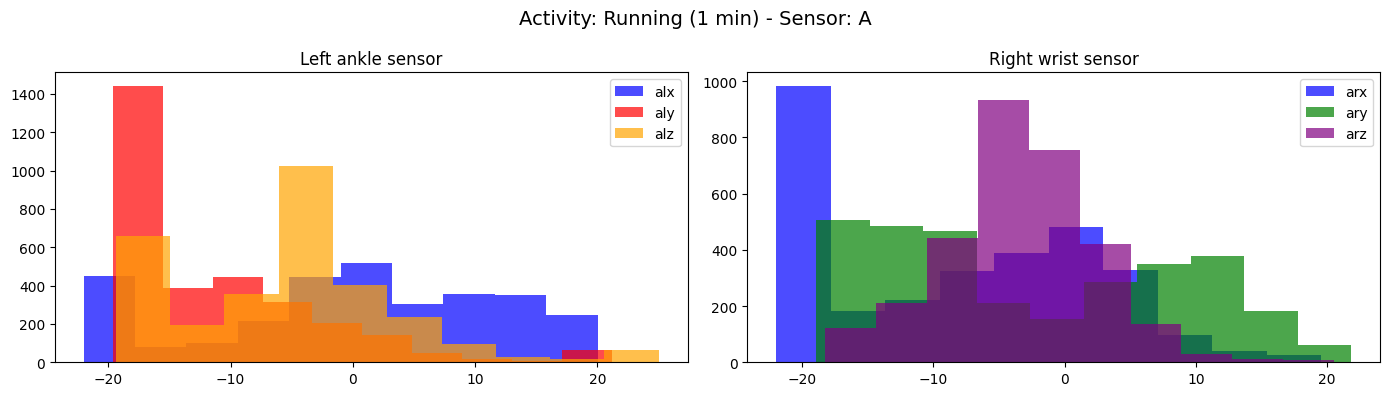

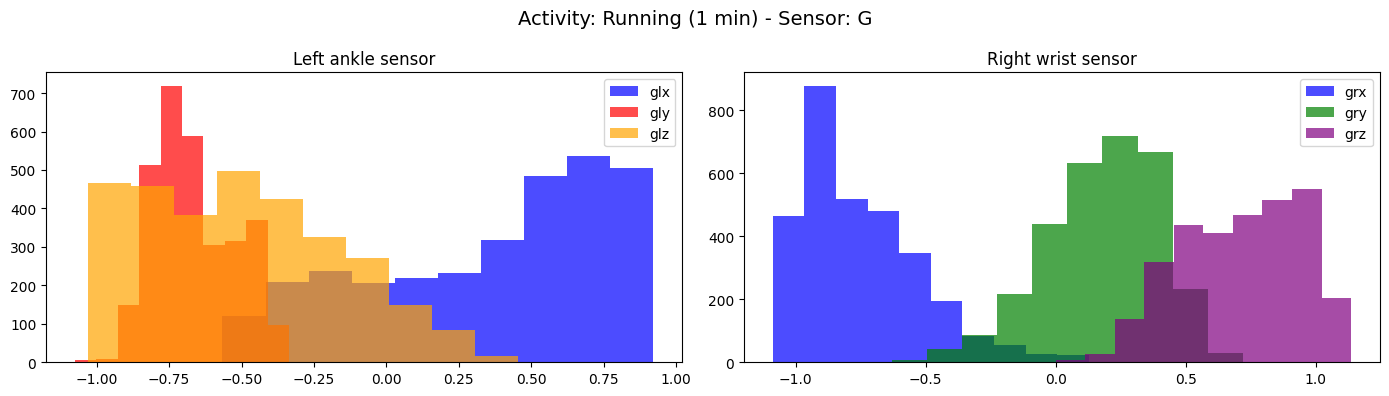

----------Jump front and back (20x) - readings--------------


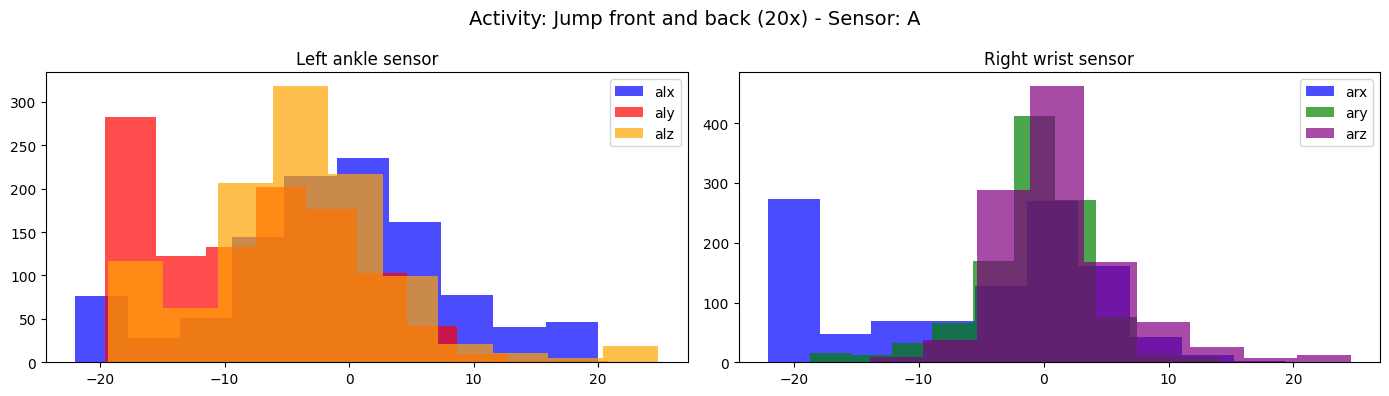

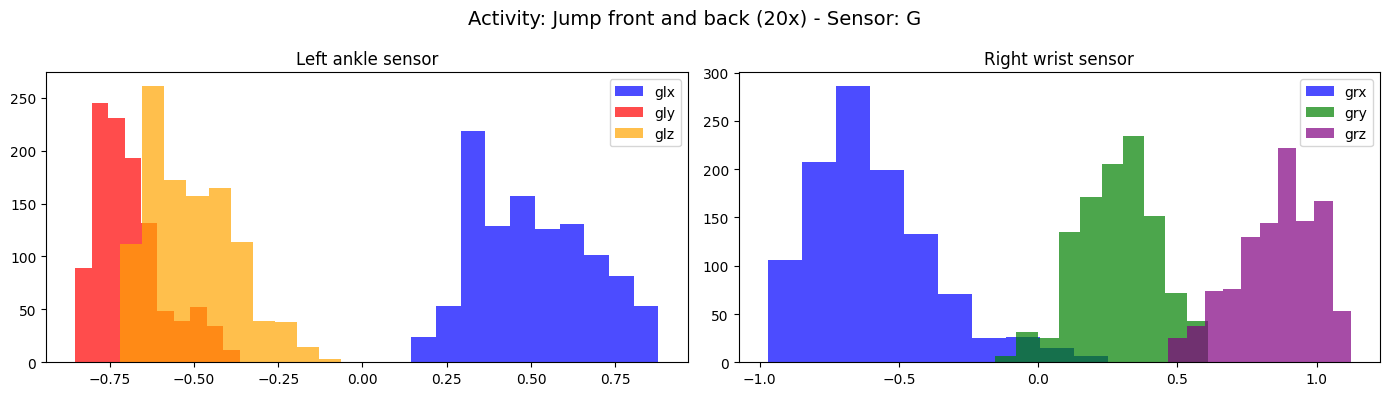

In [21]:
#plotting histograms for each activity
for i in range(1, 13):
    activity_name = activity_label[i]

    print(f"----------{activity_name} - readings--------------")

    activity_data = grouped.get_group(activity_name).reset_index(drop=True)

    for r in readings:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
        fig.suptitle(f'Activity: {activity_name} - Sensor: {r.upper()}', fontsize=14)

        # Left ankle
        ax1.hist(activity_data[r + "lx"], color='blue', alpha=0.7, label=r + "lx")
        ax1.hist(activity_data[r + "ly"], color='red', alpha=0.7, label=r + "ly")
        ax1.hist(activity_data[r + "lz"], color='orange', alpha=0.7, label=r + "lz")
        ax1.set_title('Left ankle sensor')
        ax1.legend()

        # Right wrist
        ax2.hist(activity_data[r + "rx"], color='blue', alpha=0.7, label=r + "rx")
        ax2.hist(activity_data[r + "ry"], color='green', alpha=0.7, label=r + "ry")
        ax2.hist(activity_data[r + "rz"], color='purple', alpha=0.7, label=r + "rz")
        ax2.set_title('Right wrist sensor')
        ax2.legend()

        plt.tight_layout()  
        plt.show()

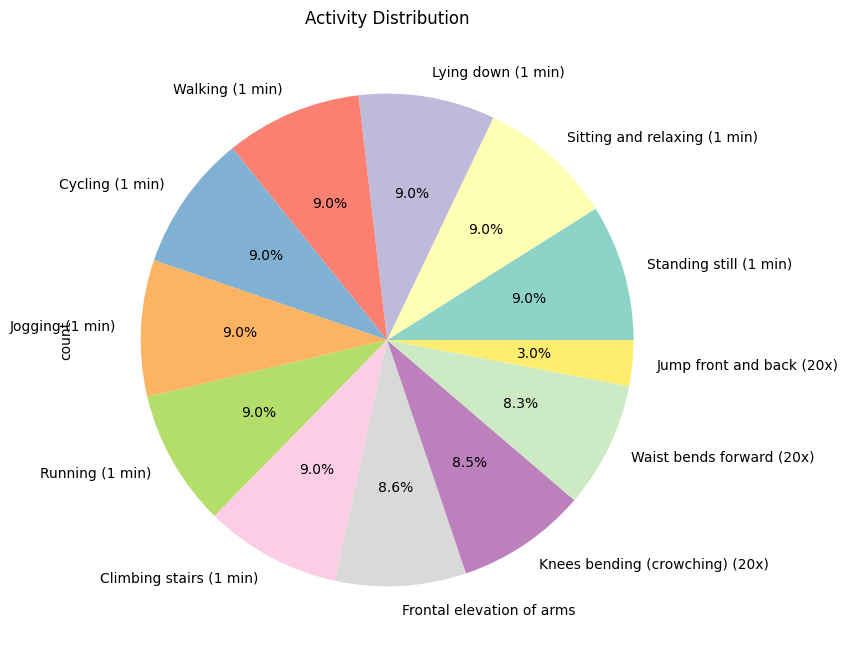

In [22]:
# Plotting pie chart for activity distribution
activity_counts = data['Activity'].value_counts()
plt.figure(figsize = (8,8))

activity_counts.plot(kind = 'pie',cmap = 'Set3',autopct = '%1.1f%%')
plt.title('Activity Distribution')

plt.show()

In [23]:
# Outlier detection and removal
df_copy = data.copy()

for feature in df_copy.select_dtypes(include = [np.number]).columns[:-2]:
    lower_range = np.quantile(data[feature],0.01)
    upper_range = np.quantile(data[feature],0.99)
    print(feature, "range:",lower_range,"to",upper_range)

    df_copy = df_copy.drop(df_copy[(df_copy[feature] > upper_range) | (df_copy[feature] < lower_range)].index,axis = 0)
    print('shape',df_copy.shape)
    

alx range: -11.56042 to 19.31
shape (336332, 14)
aly range: -19.381 to 2.692609999999992
shape (330939, 14)
alz range: -18.96706 to 14.426119999999994
shape (327588, 14)
glx range: -0.7291300000000001 to 0.8033399999999999
shape (321398, 14)
gly range: -1.0619 to 0.96998
shape (315282, 14)
glz range: -1.1041 to 0.8290799999999999
shape (310225, 14)
arx range: -21.508000000000003 to 9.345065999999985
shape (305548, 14)
ary range: -18.703 to 12.216
shape (299944, 14)
arz range: -10.738059999999999 to 11.851059999999999
shape (297700, 14)
grx range: -1.0137 to 0.96471
shape (294585, 14)


In [24]:
le = LabelEncoder()
data['subject'] = le.fit_transform(data['subject'])

In [25]:
data['Activity'] = le.fit_transform(data['Activity'])

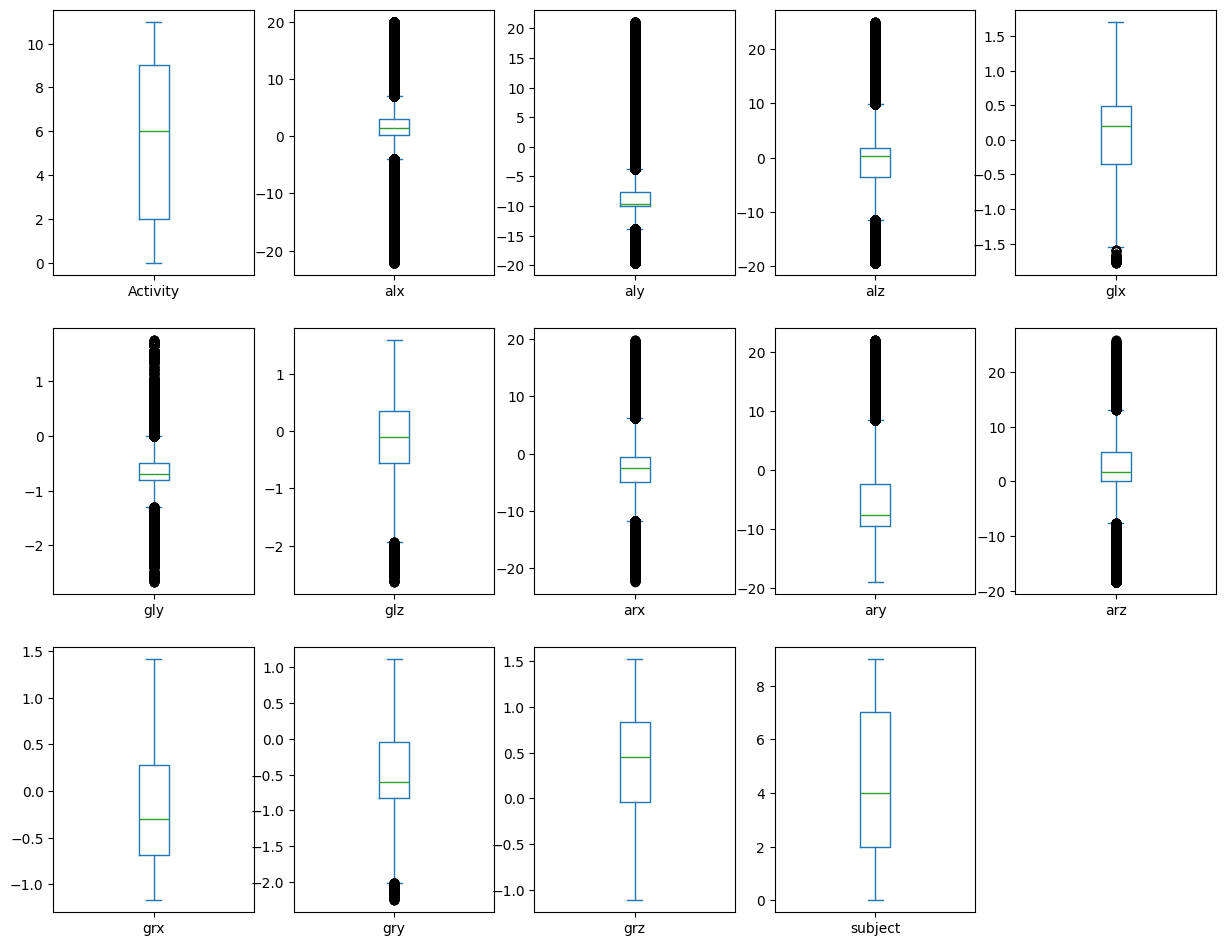

In [26]:
data.plot(kind = 'box',subplots = True,layout = (5,5),figsize = (15,20))
plt.show()

In [27]:
y = data['Activity']
x = data.drop(['Activity','subject'],axis = 1)

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state  = 24)

In [38]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler().fit(x_train)
X_train_scaled = robust.transform(x_train)
X_test_scaled = robust.transform(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Summarize the model performance
def result_summarizer(y_pred, y_test, activity_label=None):
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro',zero_divison = 0)
    rec = recall_score(y_test, y_pred, average='macro',zero_divison = 0)
    f1 = f1_score(y_test, y_pred, average='macro',zero_divison = 0)
    
    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    print(f"Recall: {rec}")
    print(f"F1 Score: {f1}")
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',
        xticklabels=activity_label.values() if activity_label else 'auto',
        yticklabels=activity_label.values() if activity_label else 'auto'
    )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
# Model 1: Logistic Regression
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_scaled, y_train)
y_pred_logistic = logistic.predict(X_test_scaled)
print("Logistic Regression Results:")
result_summarizer(y_pred_logistic, y_test)

In [ ]:
# Model 2: Lasso Regression (for comparison)
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_lasso = np.round(y_pred_lasso).astype(int)
print("\nLasso Regression Results:")
result_summarizer(y_pred_lasso, y_test)

In [ ]:
# Model 3: Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("\nSVM Results:")
result_summarizer(y_pred_svm, y_test)

In [ ]:
# Model 4: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("\nK-Nearest Neighbors Results:")
result_summarizer(y_pred_knn, y_test)

In [ ]:
# Model 5: Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)
print("\nGaussian Naive Bayes Results:")
result_summarizer(y_pred_gnb, y_test)

In [ ]:
# Model 6: Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_scaled, y_train)
y_pred_dtc = dtc.predict(X_test_scaled)
print("\nDecision Tree Classifier Results:")
result_summarizer(y_pred_dtc, y_test)

Conclusion:
In this project, various machine learning models were applied to the Human Activity Recognition dataset, and their performances were evaluated. Each model was assessed based on its accuracy, precision, recall, and F1 score, providing a comprehensive understanding of how well each algorithm can classify human activities from sensor data.

The results suggest that different models have varying levels of effectiveness depending on the characteristics of the data. While Logistic Regression and Support Vector Machine showed strong performances, models like K-Nearest Neighbors and Decision Trees also offered competitive results. Lasso Regression, with its feature selection capabilities, was particularly useful in eliminating irrelevant features.

Overall, this project demonstrates the power of machine learning in recognizing human activities and provides valuable insights into the application of these techniques to real-world sensor data. Future work may involve fine-tuning the models further using hyperparameter optimization techniques like Grid Search or exploring more advanced deep learning models for improved accuracy.







